In [26]:
#Importing the packags
# pip install --user -U nltk
# pip install -U scikit-learn

import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
df = pd.read_csv('/content/setopati-nepali.csv', encoding = '')
df = df.sample(frac = 1)
df

,category,link,news
130,kinmel,https://www.setopati.com/kinmel/automobiles/33...,सिजी मोटर्सका सिइओ हेमन्त अग्रवालले फास्ट चार्...
54,politics,https://www.setopati.com/politics/336619,प्रतिनिधि सभाको बैठक बुधबार बस्दैछ।संघीय संसद्...
424,global,https://www.setopati.com/global/india/335542,भारतको केरल राज्यको वायनाडमा भीषण पहिरोमा परी ...
159,kinmel,https://www.setopati.com/kinmel/information-te...,एनसेलका सबै मोबाइल नम्बर/ग्राहकहरूले कुनै पनि ...
56,politics,https://www.setopati.com/politics/336611,प्रधानमन्त्री केपी शर्मा ओलीले सकारले देशद्रोह...
...,...,...,...
252,sports,https://www.setopati.com/sports/sports-activit...,अमेरिकी स्प्रिन्ट स्टार नोआ लायल्सले पेरिस २०२...
7,politics,https://www.setopati.com/politics/336796,"गुल्मी, जाजरकोट लगायत केही जिल्लाका केही स्थान..."
364,blog,https://www.setopati.com/blog/334119,'चाउरिएका हातले तरकारी केलाउँदै गर्दा अझै मेरै...
25,politics,https://www.setopati.com/politics/336717,राष्ट्रिय स्वतन्त्र पार्टी (रास्वपा) की प्रतिन...


In [35]:
#No of a categories
len(set(df['category']))

7

In [36]:
df.groupby('category').category.count()

,category
category,
blog,64
global,64
kinmel,64
opinion,64
politics,64
social,64
sports,64


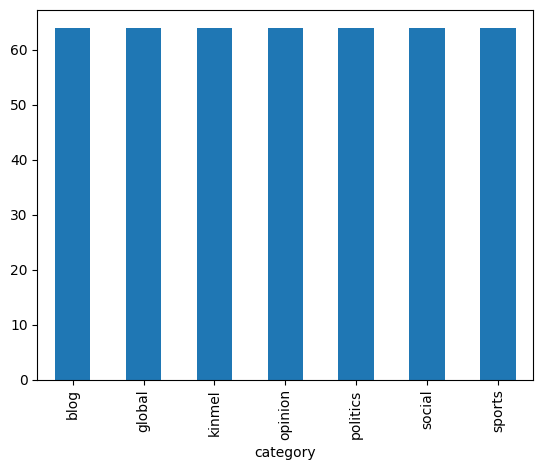

In [37]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [ ]:
#Data Preprocessing

In [38]:
#stop words
nltk.download('stopwords')
words = stopwords.words("nepali")
print(words)

['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'रहेका', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'ओठ', 'आत्म', 'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'एक', 'एकदम', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
df['news'][0]

"प्रदेशहरुकै इतिहासमा सबैभन्दा ठूलो मन्त्रिमण्डल बनाएर आलोचित बनेपछि मधेसका मुख्यमन्त्री सतिशकुमार सिंहले आठ जना राज्यमन्त्री हटाए।\xa0 मधेसका मुख्यमन्त्रीले राज्यमन्त्रीहरू\xa0हटाउँदै गर्दा कोशीमा भने मन्त्रालय थप्ने तयारी चलिरहेको छ।पहिलो पटक मुख्यमन्त्री बन्दा हिक्मत कार्कीले\xa0मन्त्रालय संख्या घटाएका थिए। उनै कार्की तेस्रो कार्यकालमा आइपुग्दा मन्त्रालय संख्या बढाउने तयारीमा जुटेका छन्। आफू मन्त्रालय बढाउने पक्षमा नरहेको बताउने मुख्यमन्त्री कार्कीले ‘कार्यबोझ बढेको खण्डमा मन्त्रालय बढ्न सक्ने’ भनेर गएको आइतबार नै यसबारे संकेत दिएका थिए।गठबन्धनको सहयात्री दल नेपाली कांग्रेस सरकारमा सहभागी नहुँदै मन्त्रालय बढ्न सक्ने बताएका मुख्यमन्त्री कार्कीले संख्या बढाउने अन्तिम तयारीमा पुर्\u200dयाएको प्रदेशका एक उच्च तहका कर्मचारीले जानकारी दिए।‘सम्भवतः अब तीन वटा मन्त्रालय थपिएला’, ती कर्मचारीले भने ‘निर्देशनअनुसार हामीले सोही रुपमा तयारी गरिरहेका छौं।’कोशीमा अहिले मुख्यमन्त्री तथा मन्त्रिपरिषदको कार्यालयबाहेक ८ मन्त्रालय छन्। यी आठमध्ये कांग्रेस र एमालेले ४–४ वटा मन्त्रालय लिने सहमति गरिसकेका

In [40]:
# df['cleaned'] = df['news'].apply(lambda x: " ".join([stemmer.stem(i) for i in x).split()])
# df['cleaned'] = df['news'].apply(lambda x: " ".join([stemmer.stem(i) for i in (x).split() if i not in words]))
df['news'] = df['news'].apply(lambda x: " ".join([stemmer.stem(i) for i in (x).split() if i not in words]))

df

,category,link,news
130,kinmel,https://www.setopati.com/kinmel/automobiles/33...,सिजी मोटर्सका सिइओ हेमन्त अग्रवालले फास्ट चार्...
54,politics,https://www.setopati.com/politics/336619,प्रतिनिधि सभाको बैठक बुधबार बस्दैछ।संघीय संसद्...
424,global,https://www.setopati.com/global/india/335542,भारतको केरल राज्यको वायनाडमा भीषण पहिरोमा परी ...
159,kinmel,https://www.setopati.com/kinmel/information-te...,एनसेलका मोबाइल नम्बर/ग्राहकहरूले सर्ट कोड वा स...
56,politics,https://www.setopati.com/politics/336611,प्रधानमन्त्री केपी शर्मा ओलीले सकारले देशद्रोह...
...,...,...,...
252,sports,https://www.setopati.com/sports/sports-activit...,अमेरिकी स्प्रिन्ट स्टार नोआ लायल्सले पेरिस २०२...
7,politics,https://www.setopati.com/politics/336796,"गुल्मी, जाजरकोट लगायत जिल्लाका स्थानमा भारी वर..."
364,blog,https://www.setopati.com/blog/334119,'चाउरिएका हातले तरकारी केलाउँदै गर्दा मेरै चिन...
25,politics,https://www.setopati.com/politics/336717,राष्ट्रिय स्वतन्त्र पार्टी (रास्वपा) की प्रतिन...


In [49]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['news']
Y = df['category'].astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression())])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [50]:
X_test

,news
364,'चाउरिएका हातले तरकारी केलाउँदै गर्दा मेरै चिन...
57,गण्डकीका मुख्यमन्त्री सुरेन्द्रराज पाण्डे मन्त...
165,'मैले ८५० रूपैयाँमा एउटा फाइनान्स कम्पनी (नाम ...
419,बंगलादेशमा आरक्षणको विरोधमा भइरहेको हिंसात्मक ...
233,नेपालको राष्ट्रिय खेल हो-भलिबल। २०७४ जेठमा मन्...
...,...
21,नेकपा (माओवादी केन्द्र) अध्यक्ष पुष्पकमल दाहाल...
114,मान्छेहरूलाई डिमेन्सिया सम्भावित कारणमा दुइटा ...
130,सिजी मोटर्सका सिइओ हेमन्त अग्रवालले फास्ट चार्...
435,बंगलादेशमा राजनीतिक तनाव बढेसँगै करिब ८ सय जना...


In [51]:
y_test

,category
364,blog
57,politics
165,kinmel
419,global
233,sports
...,...
21,politics
114,social
130,kinmel
435,global


In [52]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
# print(predict_news_cat)
print(accuracy_score(y_test,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.7941176470588235


In [53]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)
news_data_df
predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = सेतोपाटी सञ्चार प्रालिको आयोजनामा 'इभी कन्क्लेभ' सुरू भएको छ।  शुक्रबार काठमाडौंको होटल सोल्टीमा शुक्रबार दिउँसो २ बजेदेखि कन्क्लेभ सुरू भएको हो।  कन्क्लेभको उपप्रधानमन्त्री एवम् अर्थमन्त्री विष्णुप्रसाद पौडेलले उद्घाटन गरेका छन्। कन्क्लेभमा बिजुली गाडीमा तीव्रतर रूपमा विकास भइरहेका प्रविधिका साथै बिजुली गाडीको वर्तमान र भविष्यबारे छलफल भएको छ।  बिजुली गाडी वितरक, उपभोक्ता, विज्ञ, सम्बन्धित निकायका अधिकारी र प्रतिनिधिहरूको उपस्थिति रहने यो कार्यक्रमका तीन सत्र छन्।  पहिलो सत्र 'इभीः प्रेजेन्ट ट्रेन्ड्स र फ्युचर इनोभेसन्स' शी‍र्षकमा भएको छ। पत्रकार दिलभूषण पाठकले सहजीकरण गरेको यो सत्रमा बिवाइडी नेपालका सिइओ शाहिल श्रेष्ठ, सिजी मोटर्सका सिइओ हेमन्त अग्रवाल र बिजुली गाडी विज्ञ लोकेश ओलीले छलफल तथा बहस गरेका छन्।  त्यस्तै दोस्रो सत्र 'इभीः द नेसनल कन्ट्रिब्युसन' विषयमा छलफल भएको छ। पत्रकार सुदीप श्रेष्ठले सहजीकरण गरेको सो सत्रमा पूर्वअर्थ सचिव रामेश्वर खनाल, वातावरणविद भूषण तुलाधर र दी गो क्लिन इनर्जीका अध्यक्ष राजन रायमाझीले आफ्ना भनाइहरू राखेका छन्।  अन्तिम सत्र 'इभीः पावर स

In [54]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(ytest,model.predict(X_test)))

              precision    recall  f1-score   support

        blog       0.80      0.67      0.73        12
      global       0.86      0.86      0.86         7
      kinmel       0.91      0.77      0.83        13
     opinion       0.62      0.89      0.73         9
    politics       0.71      1.00      0.83        10
      social       1.00      0.50      0.67        10
      sports       0.88      1.00      0.93         7

    accuracy                           0.79        68
   macro avg       0.82      0.81      0.80        68
weighted avg       0.83      0.79      0.79        68

[[ 8  0  0  4  0  0  0]
 [ 0  6  0  0  0  0  1]
 [ 0  1 10  1  1  0  0]
 [ 1  0  0  8  0  0  0]
 [ 0  0  0  0 10  0  0]
 [ 1  0  1  0  3  5  0]
 [ 0  0  0  0  0  0  7]]


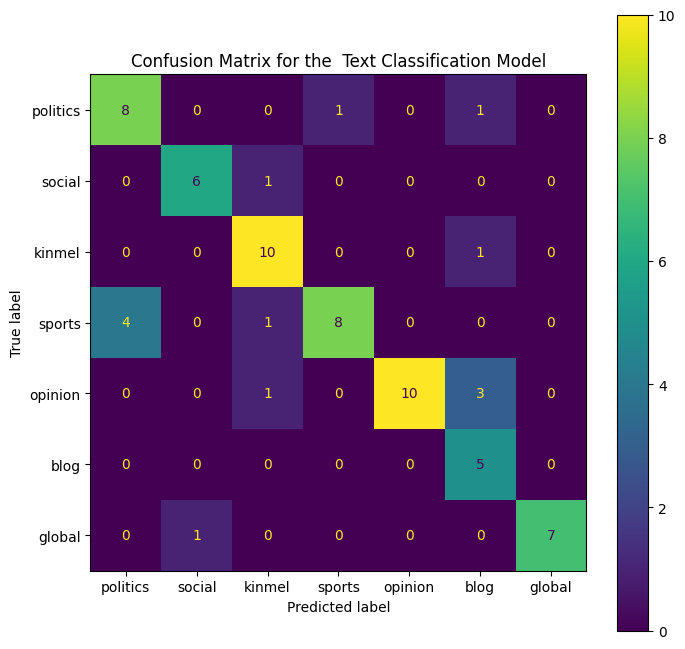

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['politics','social','kinmel','sports','opinion','blog','global']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);